In [8]:
from sklearn.datasets import load_boston

dataset = load_boston()


print(dataset.keys())

print(dataset.feature_names)
print(dataset.DESCR)


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employ

<IPython.core.display.Javascript object>


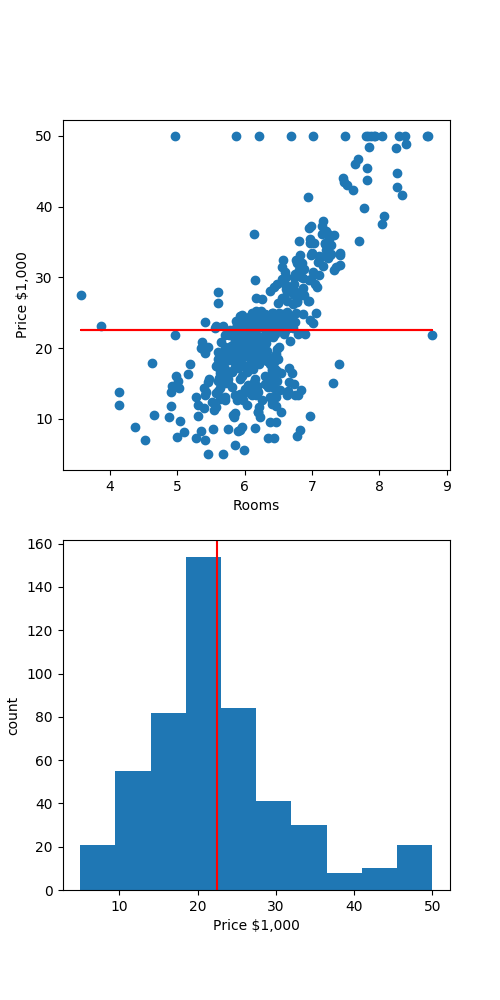

In [52]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize=(5, 10))
sp_ax = fig.add_subplot(2, 1, 1)
hi_ax = fig.add_subplot(2, 1, 2)

mean_price = np.mean(dataset.target)


def plot_mean(m):
    sp_ax.clear()
    hi_ax.clear()
    sp_ax.set(xlabel='Rooms', ylabel='Price $1,000')
    hi_ax.set(xlabel='Price $1,000', ylabel='count')  
    
    sp_ax.scatter(dataset.data[:,5], dataset.target)
    sp_ax.plot(dataset.data[:,5], np.ones(shape=len(dataset.data))*m, color='r' )

    hi_ax.hist(dataset.target)
    hi_ax.axvline(x=m, color='r')
    
    fig.canvas.draw()

    
plot_mean(mean_price)

# \begin{align}\large\text{Cost} & = \large\frac{1}{2}(\large\text{desired} - \large\text{actual})^2\end{align} 


# \begin{align}\frac{\partial{C}}{\partial{a}} & = \text{actual} - \text{desired} \end{align}

<IPython.core.display.Javascript object>


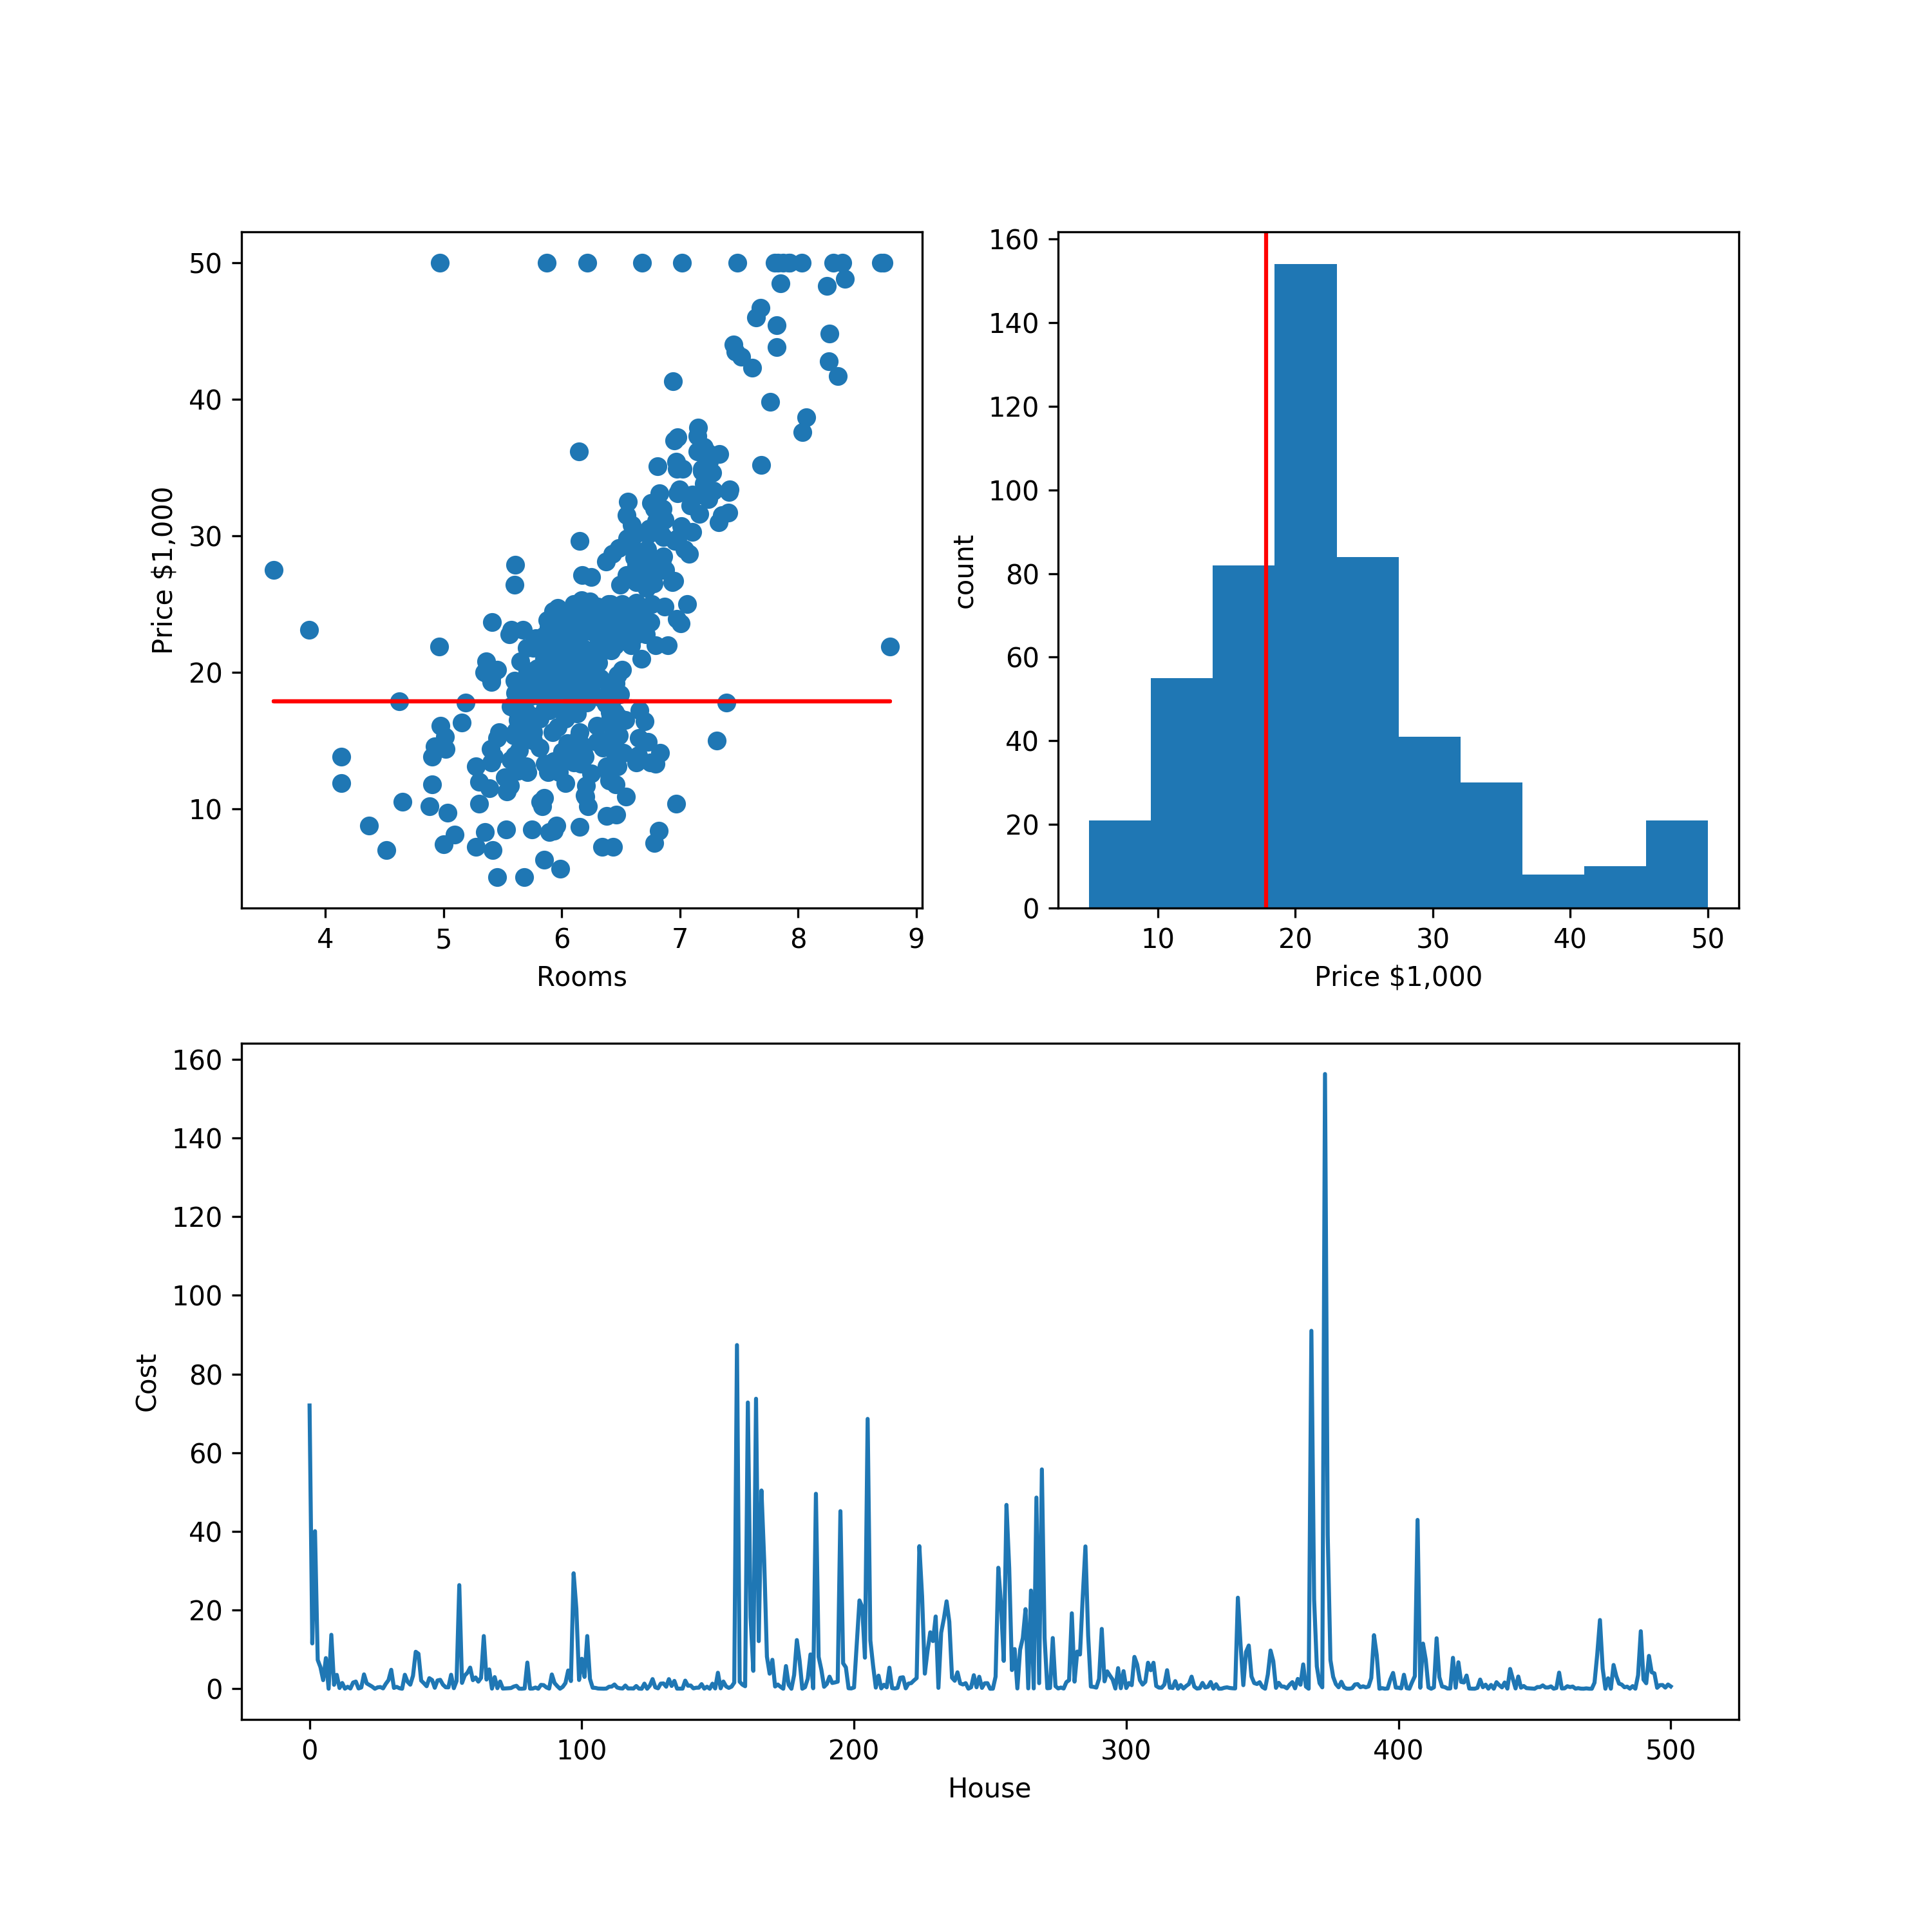

In [132]:
fig = plt.figure(figsize=(10, 10))
sp_ax = fig.add_subplot(2, 2, 1)
hi_ax = fig.add_subplot(2, 2, 2)
co_ax = plt.subplot2grid((2, 2), (1, 0), colspan=2)

mean_price = 0
learning_rate = .5

def cost(y, a, derivative=False):
    if derivative:
        return a - y
    return .5*((y-a)**2)

costs = []

for (i, price) in enumerate(dataset.target):
#     mean_price = mean_price - (mean_price - price)
    mean_price -= cost(price, mean_price, derivative=True)*learning_rate
    costs.append(cost(price, mean_price))

    if i % 10 == 0:
        co_ax.clear()
        co_ax.set(xlabel='House', ylabel='Cost')
        co_ax.plot(costs)
        plot_mean(mean_price)

# Two Functions

### Input => ( predictor ) => prediction => ( cost ) => error


# A Line

# \begin{align}y = m*x + b\end{align}


# \begin{align}\frac{\partial{C}}{\partial{m}} &= \frac{\partial{C}}{\partial{y}}\frac{\partial{y}}{\partial{m}}\end{align}

# \begin{align}\frac{\partial{C}}{\partial{b}} &= \frac{\partial{C}}{\partial{y}}\frac{\partial{y}}{\partial{b}}\end{align}

# \begin{align}\frac{\partial{y}}{\partial{m}} &= x\end{align}

# \begin{align}\frac{\partial{y}}{\partial{b}} &= 1\end{align}


<IPython.core.display.Javascript object>


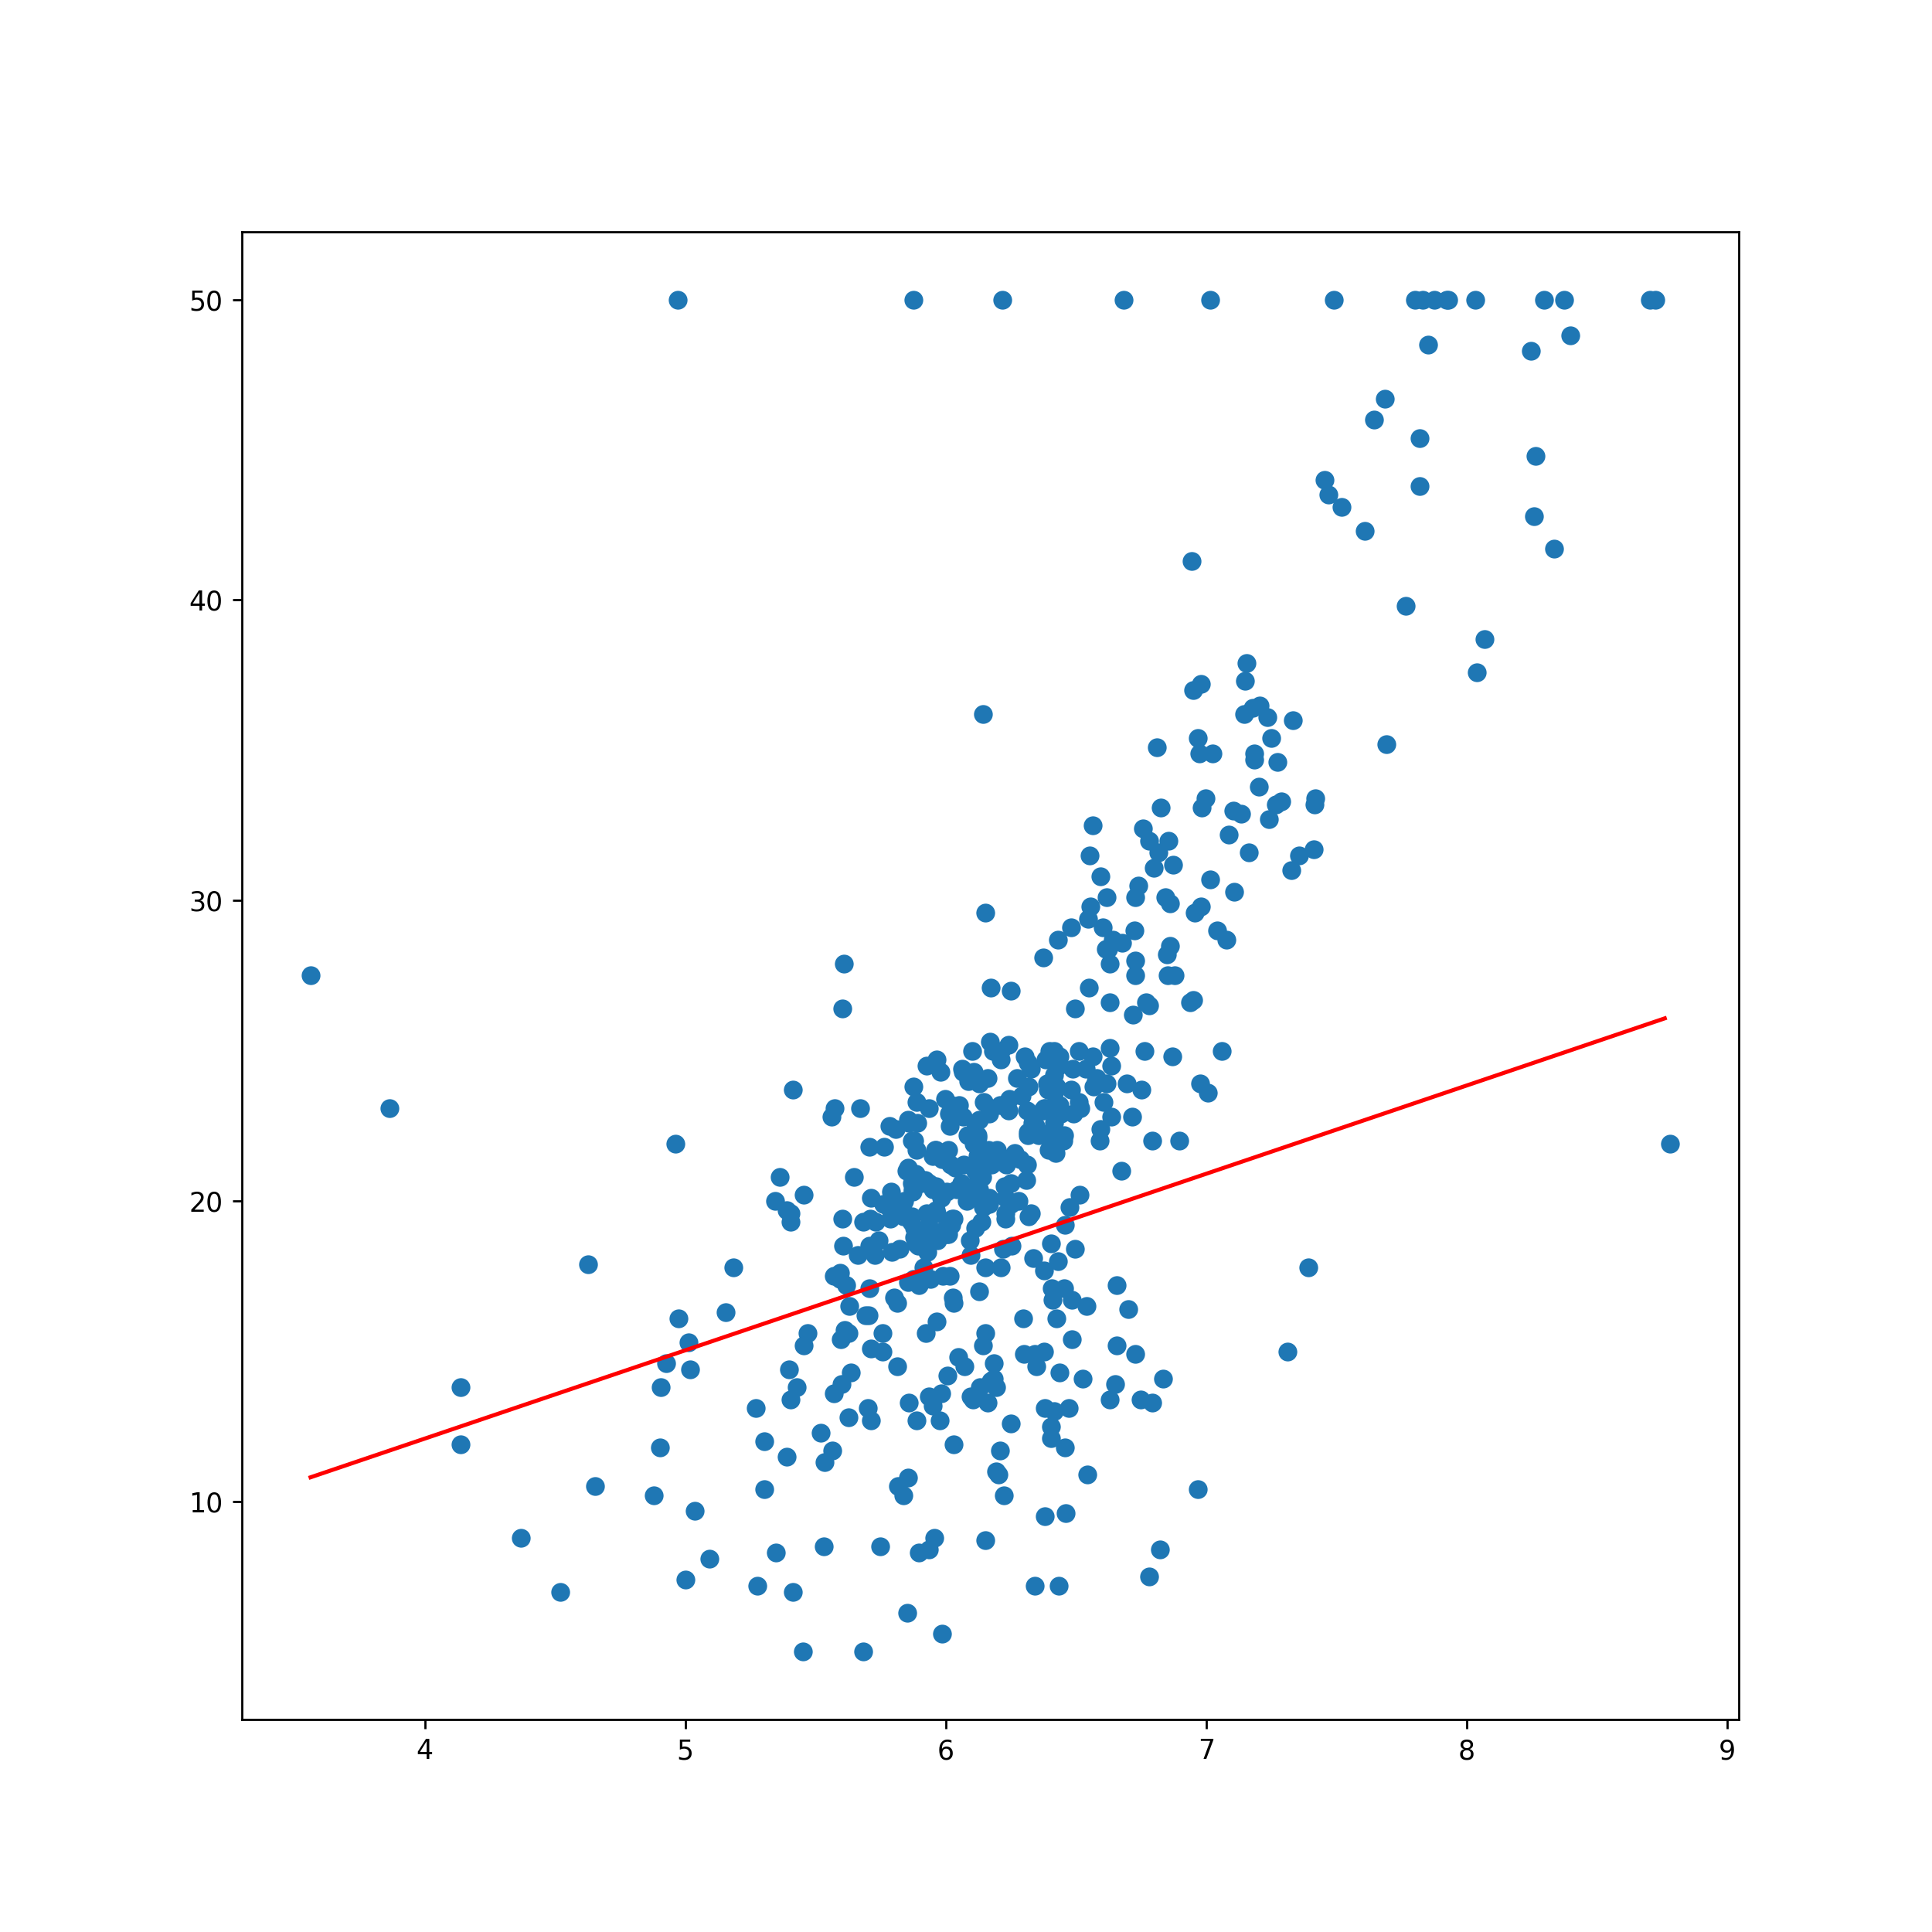

In [133]:
%matplotlib notebook

fig = plt.figure(figsize=(10, 10))
sp_ax = fig.add_subplot(1, 1, 1)

class Predictor:
    def __init__(self):
        self.m = 0
        self.b = 0
        
    def __call__(self, x):
        self.dy_dm = x
        return self.m*x + self.b
    

predict = Predictor()



learning_rate = .001
data_norm = dataset.data[:,5]
x = np.arange(min(data_norm), max(data_norm), .1)


for (i, (rooms, price)) in enumerate(zip(data_norm, dataset.target)):
    y = predict(rooms)
    dC_dy = cost(price, y, derivative=True)
    dC_dm = dC_dy * predict.dy_dm
    dC_db = dC_dy
    
    predict.m = predict.m - dC_dm * learning_rate
    predict.b = predict.b - dC_db * learning_rate
    
    if i % 10 == 0:
        fig.show()
        fig.canvas.draw()      
        sp_ax.clear()
        
        sp_ax.scatter(data_norm, dataset.target)
        sp_ax.plot(x, predict(x), color='r' )


        fig.canvas.draw()   # draw
        plt.show()
